In [10]:
import pandas as pd
import numpy as np


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
trainDataSet = pd.read_csv('titanic_train.csv')

In [13]:
trainDataSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
trainDataSet.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

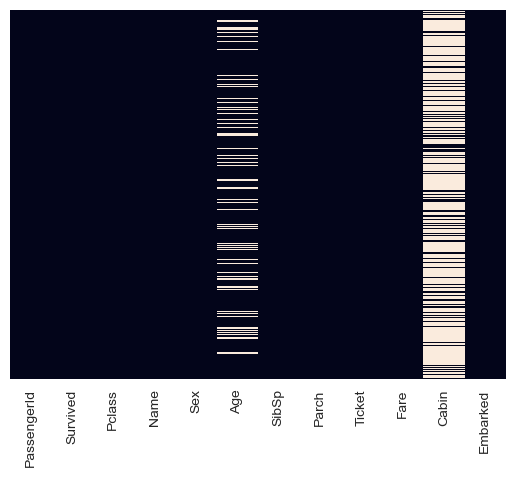

In [15]:
sns.heatmap(trainDataSet.isnull(), yticklabels = False, cbar = False)

# white points = true = null

In [16]:
# sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

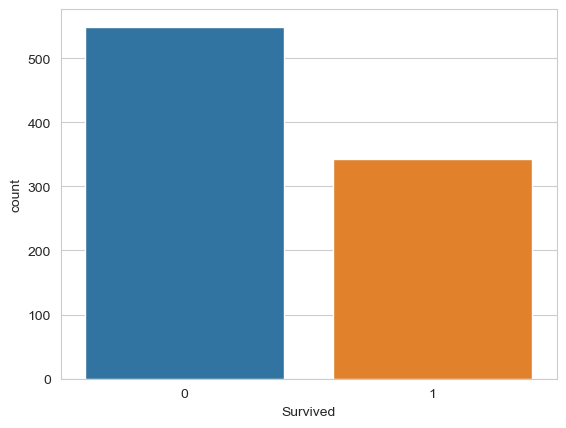

In [18]:
sns.countplot(x = 'Survived', data = trainDataSet)

In [19]:
# 0 not survived = 500
# 1 survived = 350

<AxesSubplot:xlabel='Survived', ylabel='count'>

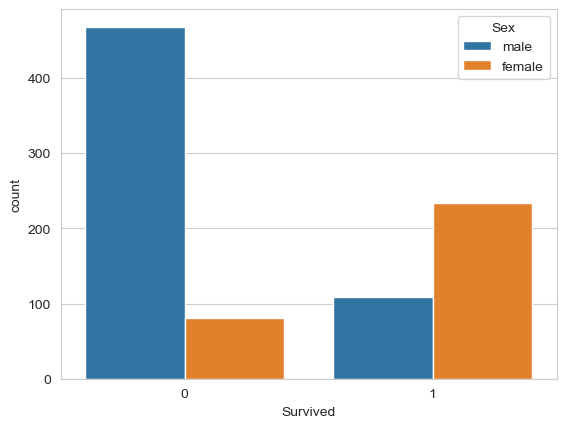

In [20]:
sns.countplot(x = 'Survived', hue = 'Sex', data = trainDataSet)

<AxesSubplot:xlabel='Survived', ylabel='count'>

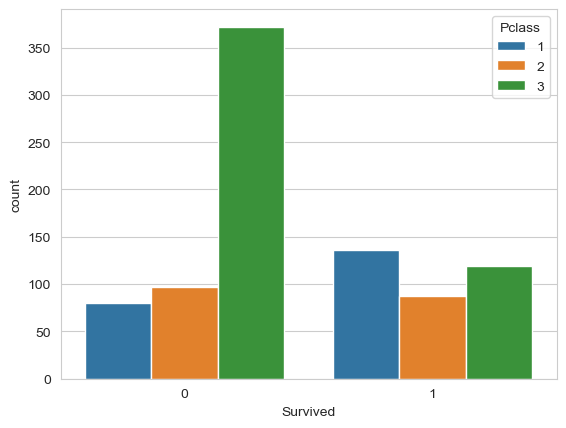

In [21]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = trainDataSet)

<AxesSubplot:xlabel='Survived', ylabel='count'>

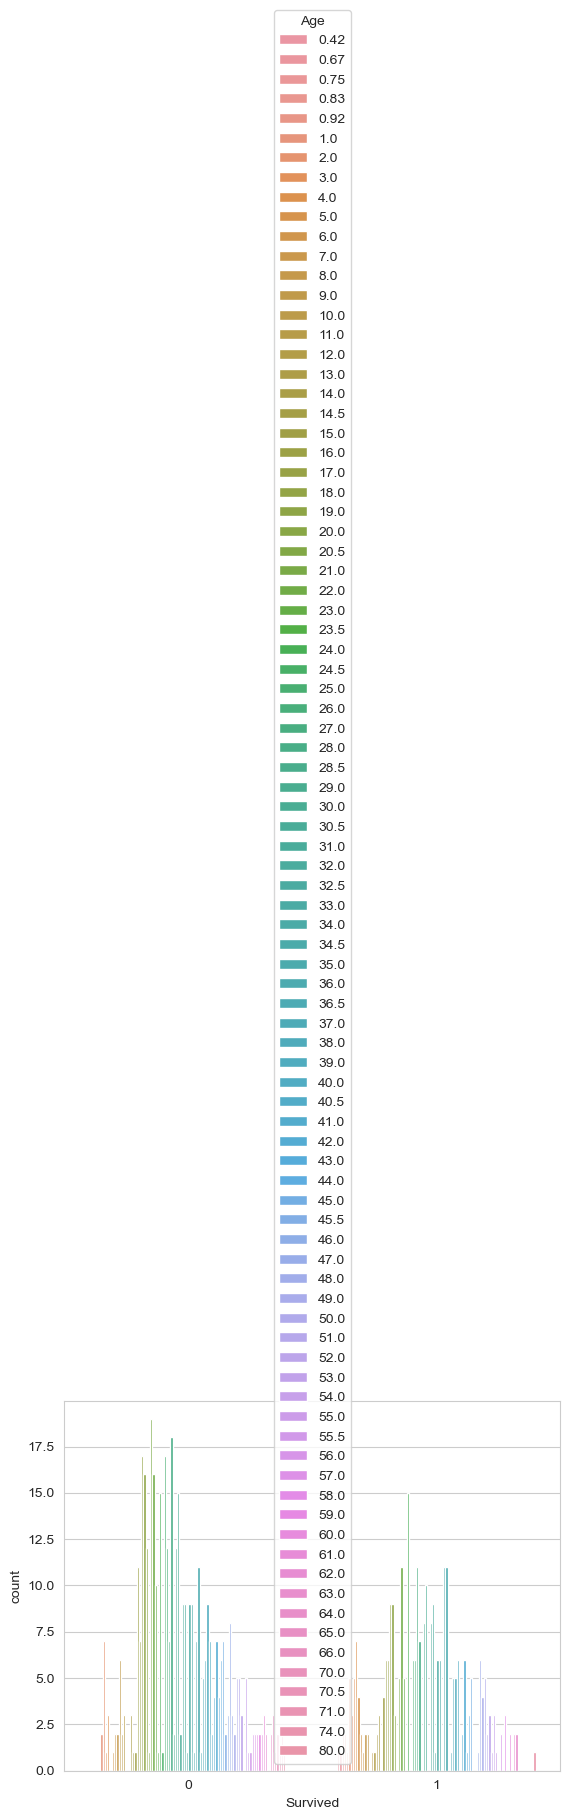

In [22]:
sns.countplot(x = 'Survived', hue = 'Age', data = trainDataSet)

C:\Users\MONISHA JAIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

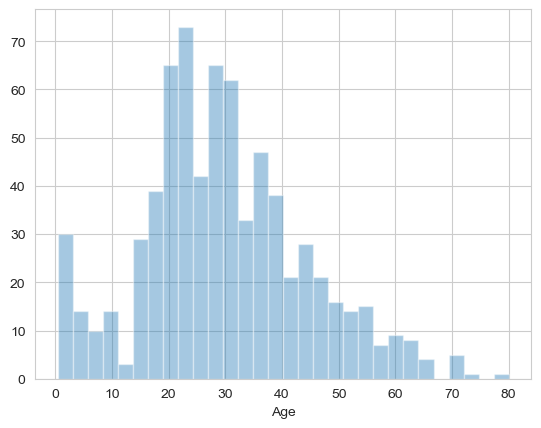

In [23]:
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

<AxesSubplot:ylabel='Frequency'>

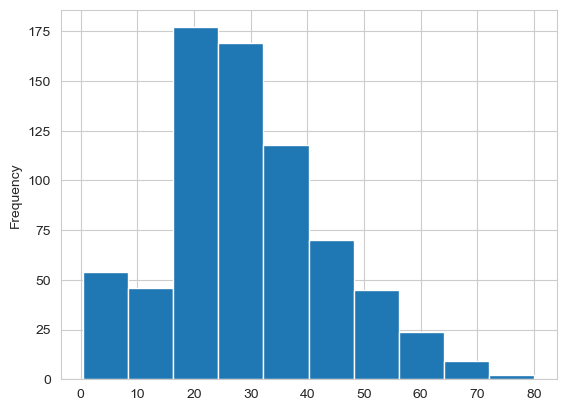

In [24]:
train['Age'].plot.hist()

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

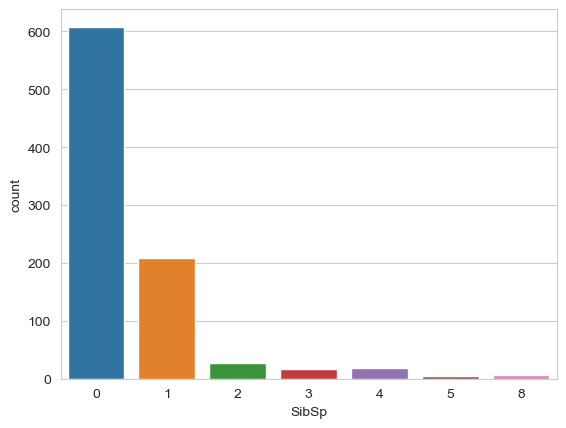

In [27]:
sns.countplot(x = 'SibSp', data = train)

In [28]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<AxesSubplot:>

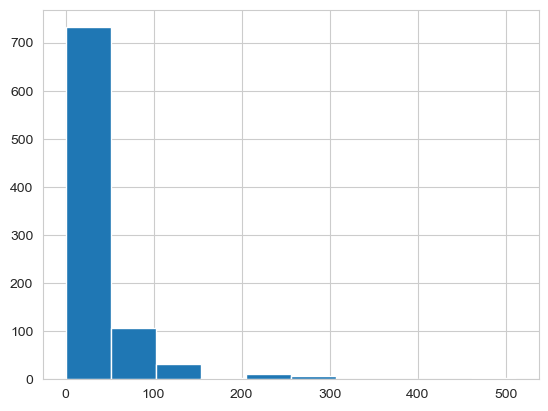

In [29]:
train['Fare'].hist()

<AxesSubplot:>

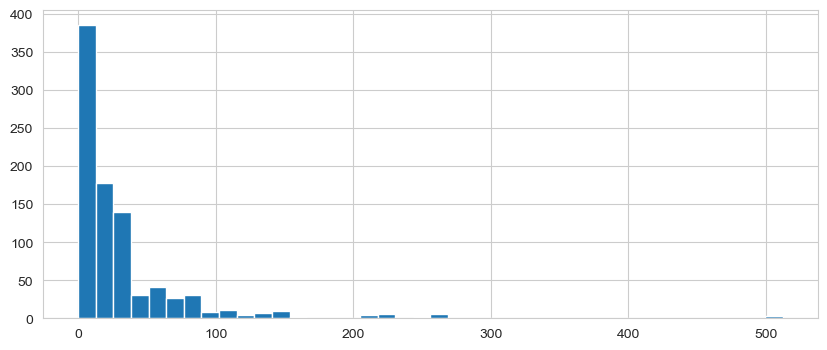

In [31]:
train['Fare'].hist(bins = 40, figsize = (10, 4))

In [32]:
import cufflinks as cf

In [33]:
cf.go_offline()

In [34]:
train['Fare'].iplot(kind = 'hist', bins = 50)

# 2 Logistic Regression Cleaning the dirty data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

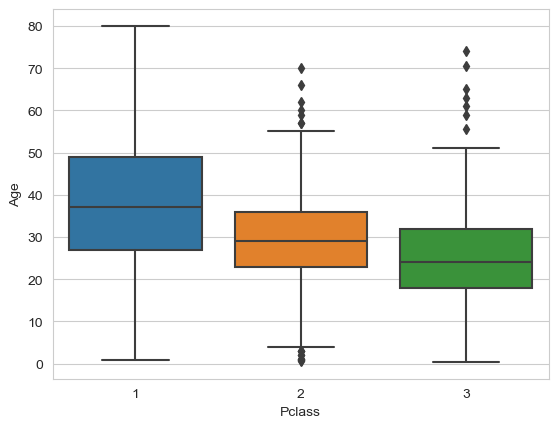

In [35]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [ ]:
# Coz Age has null values 

In [41]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37  # avg if null
        elif Pclass == 2:
            return 29
        else: 
            return 24
    else:
        return Age

In [42]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

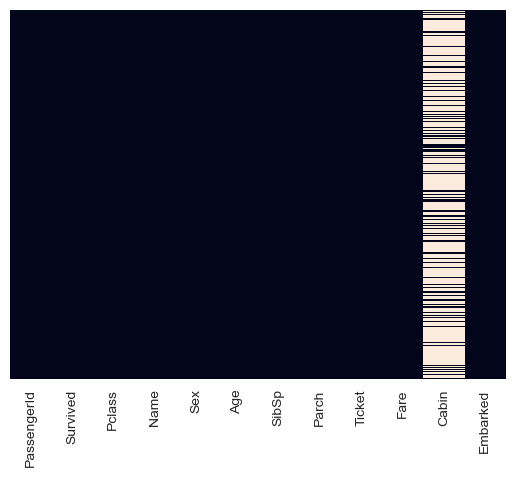

In [46]:
# sns.heatmap(train.isnull())

sns.heatmap(train.isnull(), yticklabels = False, cbar = False)


# yticklabels = False, cbar = False -> we dont get side bar numbers and bar

In [47]:
train.drop('Cabin', axis = 1, inplace = True)

In [48]:
train.head()

# we dont have cabin col with axis = 1 for col and inplace = True

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

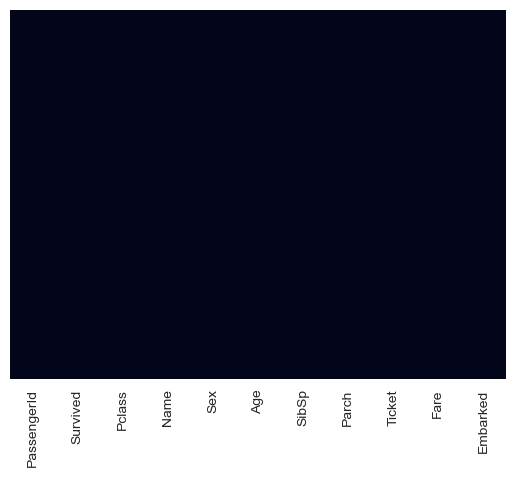

In [49]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)


In [51]:
train.dropna() # dropping all null values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [52]:
pd.get_dummies(train['Sex'])

# categorical with strings "yes" or "no", "male" "female" etc
# to numerical

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [53]:
pd.get_dummies(train['Sex'], drop_first = True)


,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [54]:
sex = pd.get_dummies(train['Sex'])


In [55]:
embark = pd.get_dummies(train['Embarked'])

In [56]:
embark

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [57]:
# Replace sex col male and embark col Q S with C Q S

In [58]:
train = pd.concat([train, sex, embark], axis = 1)

In [59]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1


In [60]:
sex = pd.get_dummies(train['Sex'], drop_first = True)


In [61]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [64]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [65]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [66]:
train = pd.concat([train, sex, embark], axis = 1)

In [68]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1,1,0,1


In [76]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

KeyError: "['Sex' 'Embarked' 'Name' 'Ticket'] not found in axis"

In [75]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1,1,0,1


In [77]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,male,Q,S
886,887,0,2,27.0,0,0,13.00,0,1,0,0,1,1,0,1
887,888,1,1,19.0,0,0,30.00,1,0,0,0,1,0,0,1
888,889,0,3,24.0,1,2,23.45,1,0,0,0,1,0,0,1
889,890,1,1,26.0,0,0,30.00,0,1,1,0,0,1,0,0
890,891,0,3,32.0,0,0,7.75,0,1,0,1,0,1,1,0


In [78]:
train.drop('PassengerId', axis = 1, inplace = True)

In [79]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,1,0,1


In [81]:
pclass = pd.get_dummies(train['Pclass'])

In [82]:
pclass

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [83]:
pclasss = pd.get_dummies(train['Pclass'], drop_first = True)

In [84]:
pclasss

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [85]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1


In [86]:
train.drop('Pclass', axis = 1, inplace = True)

In [87]:
train.head(3)

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,male,Q,S
0,0,22.0,1,0,7.2500,0,1,0,0,1,1,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1


# 3 Logistic Regression Train the data and explore

In [88]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

# y for predicting

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
logmodel = LogisticRegression()

In [94]:
logmodel.fit(X_train, y_train)

C:\Users\MONISHA JAIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [95]:
predictions = logmodel.predict(X_test)

In [96]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.65      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
confusion_matrix(y_test, predictions)

array([[132,  22],
       [ 40,  74]], dtype=int64)